In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


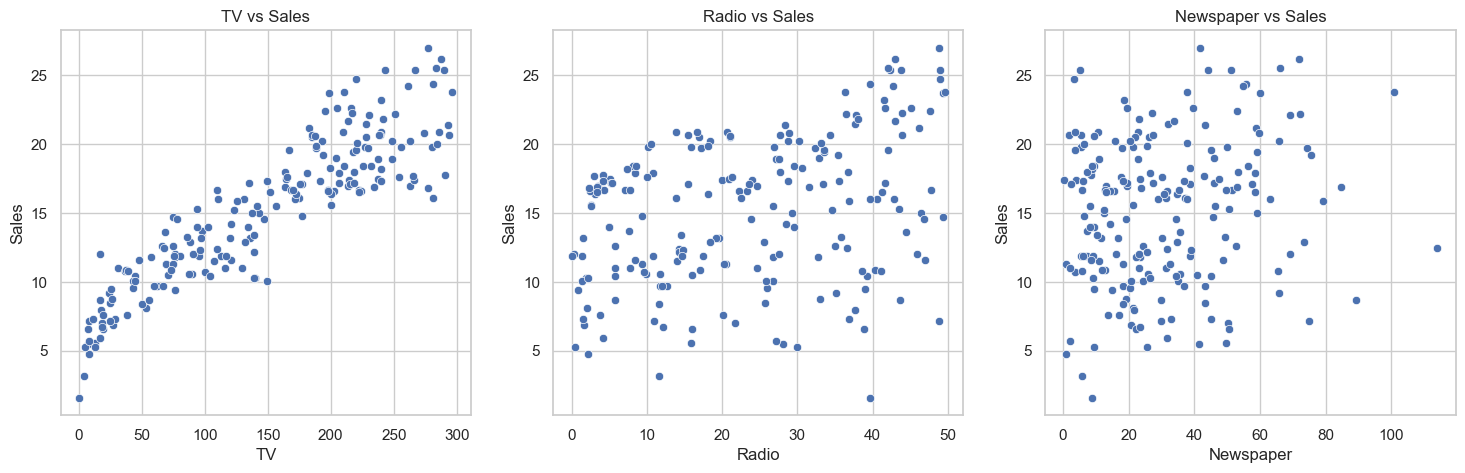

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of the plots
sns.set(style="whitegrid")

# Creating scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# TV vs Sales
sns.scatterplot(x='TV', y='Sales', data=df, ax=axs[0])
axs[0].set_title('TV vs Sales')

# Radio vs Sales
sns.scatterplot(x='Radio', y='Sales', data=df, ax=axs[1])
axs[1].set_title('Radio vs Sales')

# Newspaper vs Sales
sns.scatterplot(x='Newspaper', y='Sales', data=df, ax=axs[2])
axs[2].set_title('Newspaper vs Sales')

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Defining features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [17]:
from sklearn.linear_model import LinearRegression

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# Model 1: Linear Regression


# Initializing the Linear Regression model
lr_model = LinearRegression()

# Training the model
lr_model.fit(X_train_scaled, y_train)

# Making predictions on the testing data
y_pred = lr_model.predict(X_test_scaled)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 1.2748262109549344
Mean Squared Error (MSE): 2.9077569102710923
R-squared (R²): 0.9059011844150826


In [21]:
# Another set of features that would support continous values based processes
from sklearn.tree import DecisionTreeClassifier

data=df.copy()

bins = [0, 10, 20, data['Sales'].max()]
labels = ['Low', 'Medium', 'High']
data['Sales_binned'] = pd.cut(data['Sales'], bins=bins, labels=labels, include_lowest=True)

# Defining the target variable
y = data['Sales_binned']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_train_scaled, y_train)

# Making predictions on the testing data
y_pred = dt_model.predict(X_test_scaled)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Printing the accuracy
print(f'Accuracy: {accuracy}')

Accuracy: 0.825


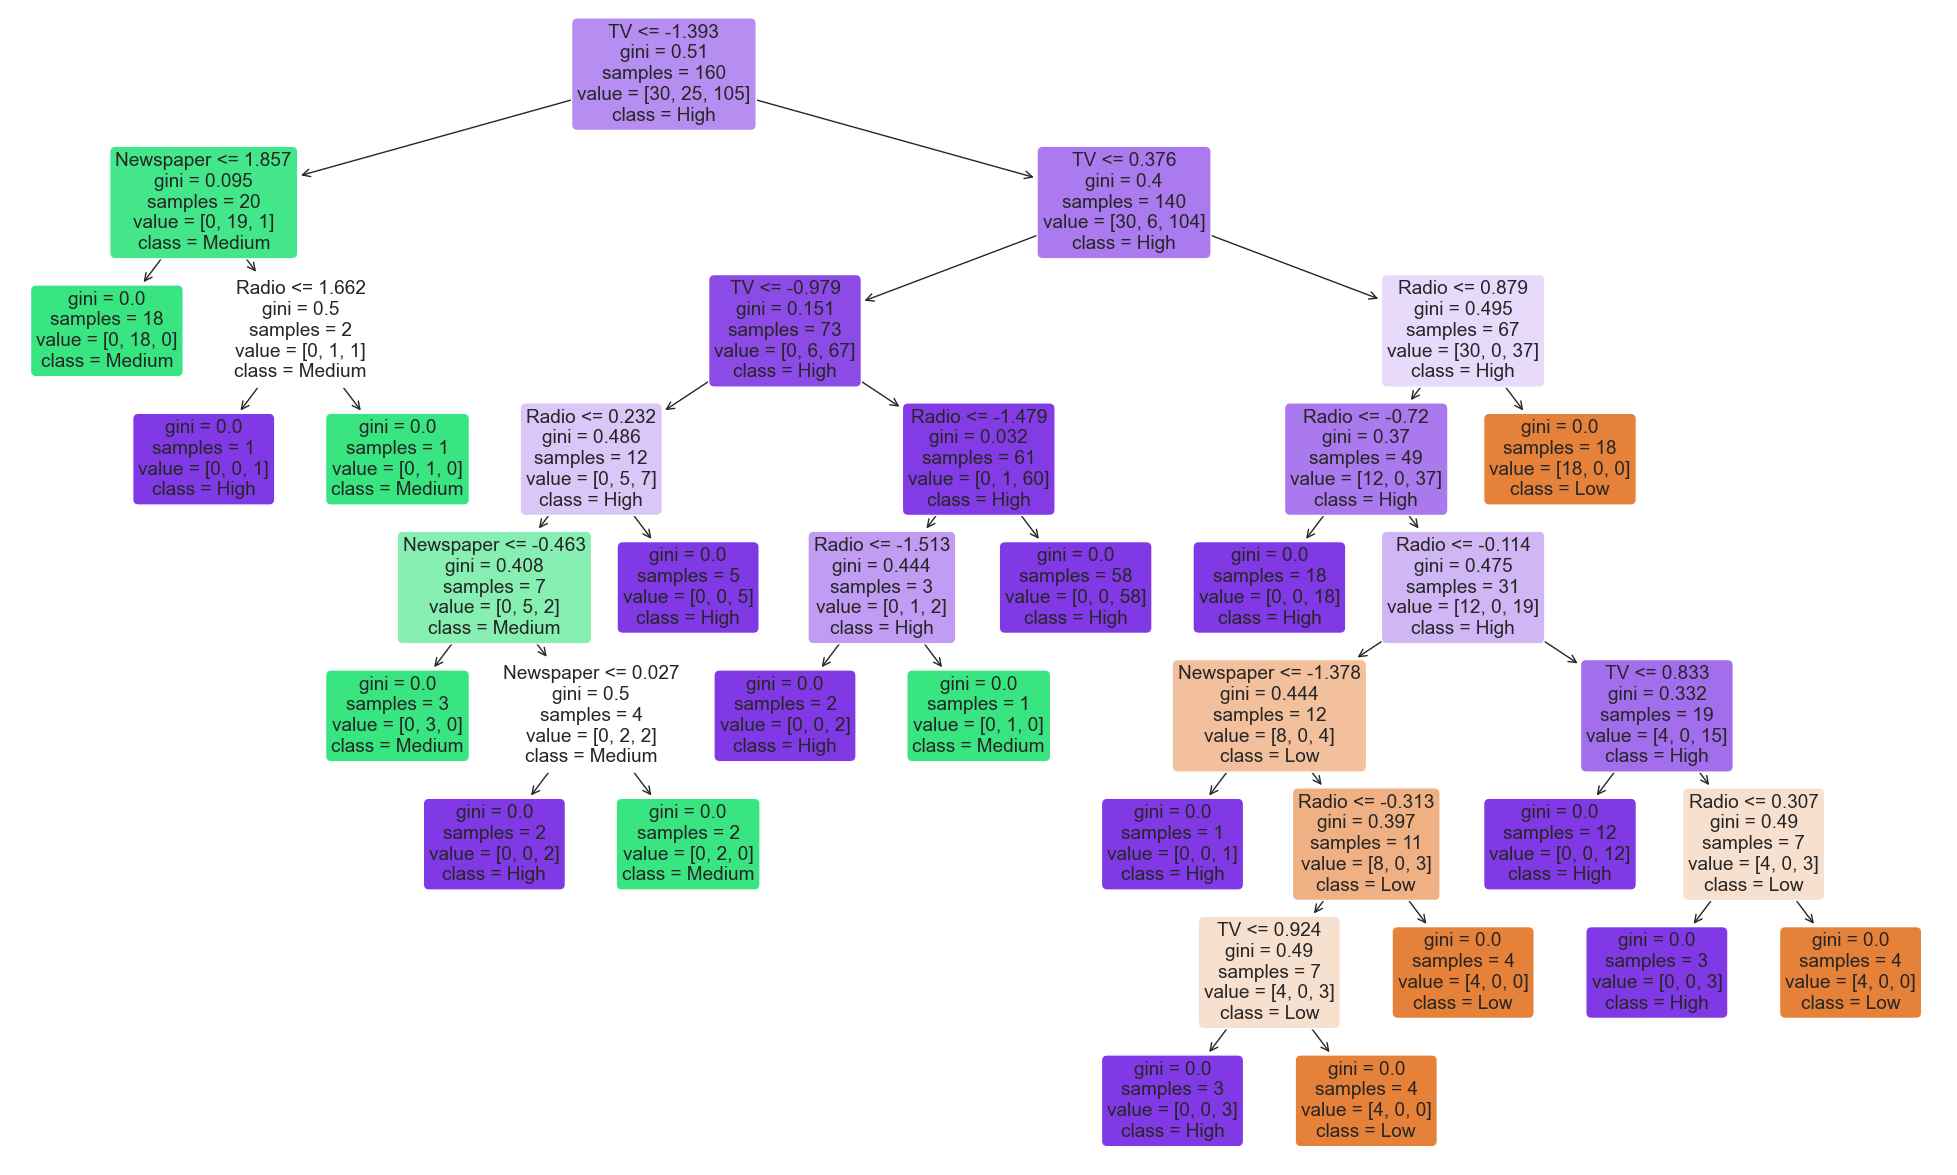

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))
plot_tree(dt_model, feature_names=['TV', 'Radio', 'Newspaper'], class_names=labels, filled=True, rounded=True)
plt.show()